# MATH 210 Introduction to Mathematical Computing

George Rozitis 74778151

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In the game of Pokemon, you catch and train Pokemon (Pocket Monsters for short) to become the Pokemon Master. Over time your Pokemon will get stronger or maybe even [evolve](https://bulbapedia.bulbagarden.net/wiki/Evolution) into something new.

What I'm here to do is to find out which Pokemon can are the best. These are some questions I will try to answer:
1. How do each of the Pokemon compare when their base stat total is plotted with another statistic?
2. How many Pokemon have above average individual stats, and how many?
3. Do the same thing above, but compare them in each generation.
4. Which generation(s) could be considered the strongest?

### Executive Summary:
1. When plotting base experience against stat total, three distinct lines appear. The strongest Pokemon mostly appear on the high line.
2. The number of Pokemon with above average individual stats in every category (as a whole) is 77.
3. The number of Pokemon with above average individual stats in every category (within each generation) is 77 as well.
4. Generations 4 and 7 consist of the strongest Pokemon, while generations 1 through 3 are the weakest.

**NOTE:** This is only valid up to the first seven generations of Pokemon (generations are explained later). Over time new Pokemon might be added.

### Table of Contents

1. Importing Data
2. Plotting Data
3. Comparing by average
    * Comparison as a whole
    * Comparison by generation
4. Extra stuff

## 1. Importing Data

I have two data sets: `pokemon.csv` and `pokemon_stats.csv`. They can both, alongside many other Pokemon related datasets, be located [here](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

`pokemon.csv` consists of:
* **id**: Pokemon's index in the dataset
* **identifier**: Pokemon's name
* **species_id**: Pokemon's National Pokedex number (see more here: [National Pokedex](https://bulbapedia.bulbagarden.net/wiki/National_Pok%C3%A9dex), [List of Pokemon by National Pokedex number](https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_National_Pok%C3%A9dex_number))
* **height**: Pokemon's height in intervals of 0.1m (e.g. a height of 7 is 0.7m)
* **weight**: Pokemon's weight in intervals of 0.1kg (e.g. a height of 69 is 6.9kg)
* **base_experience**: The amount of experience that is given if another Pokemon defeats it in battle
* **order**: Instead of a normal index, the order includes Pokemon's other forms interwined (e.g. while Charmander has id = 4, Mega Venusaur has order = 4, where Charmander has order = 5)
* **is_default**: If the Pokemon is of the normal form

`pokemon_stats.csv` consists of:
* **pokemon_id**: Pokemon's index in the dataset
* **stat_id**: The stat of the Pokemon
    * For a better explanation, each Pokemon have six different stats. These are: HP (Health Points), Attack, Defense, Special Attack, Special Defense, and Speed. They are labeled 1 through 6 in the data set respectively (see more here: [Base stats](https://bulbapedia.bulbagarden.net/wiki/Base_stats)).
* **base_stat**: The base stat of stat_id
* **effort**: The effort value that is given if another Pokemon defeats it in battle (see more here: [Effort values](https://bulbapedia.bulbagarden.net/wiki/Effort_values))

In [2]:
data = pd.read_csv('pokemon.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 8 columns):
id                 964 non-null int64
identifier         964 non-null object
species_id         964 non-null int64
height             964 non-null int64
weight             964 non-null int64
base_experience    964 non-null int64
order              964 non-null int64
is_default         964 non-null int64
dtypes: int64(7), object(1)
memory usage: 60.3+ KB


In [4]:
data.head()

,id,identifier,species_id,height,weight,base_experience,order,is_default
0,1,bulbasaur,1,7,69,64,1,1
1,2,ivysaur,2,10,130,142,2,1
2,3,venusaur,3,20,1000,236,3,1
3,4,charmander,4,6,85,62,5,1
4,5,charmeleon,5,11,190,142,6,1


In [5]:
stats = pd.read_csv('pokemon_stats.csv')

In [6]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5784 entries, 0 to 5783
Data columns (total 4 columns):
pokemon_id    5784 non-null int64
stat_id       5784 non-null int64
base_stat     5784 non-null int64
effort        5784 non-null int64
dtypes: int64(4)
memory usage: 180.8 KB


In [7]:
stats.head()

,pokemon_id,stat_id,base_stat,effort
0,1,1,45,0
1,1,2,49,0
2,1,3,49,0
3,1,4,65,1
4,1,5,65,0


Each stat for the Pokemon takes up a row in the data set.

In [8]:
hp  = stats[stats['stat_id'] == 1]
atk = stats[stats['stat_id'] == 2]
dfn = stats[stats['stat_id'] == 3]
sat = stats[stats['stat_id'] == 4]
sdf = stats[stats['stat_id'] == 5]
spd = stats[stats['stat_id'] == 6]
a = [hp, atk, dfn, sat, sdf, spd]
b = ['hp', 'atk', 'def', 'sat', 'sdf', 'spd']

Each stat is now a data set, and has been put into a list. I've also created a list of the strings that I plan on each of the column headers. This is for easier use in the future.

In [9]:
# Going through each of the stats
for i in range(0,6):
    # Reset index using the list of the data sets, as each
    # of the data sets would have the index going up by 6 every time
    a[i] = a[i].reset_index()
    
    # Adding the new data set to the main data set
    data = pd.concat([data, a[i]['base_stat']], axis=1)
    
    # Changing the name of the data set accordingly
    data.rename(columns={'base_stat': b[i]}, inplace=True)

# Creating a new column, total, which is the total of each of
# the stats of the Pokemon
data_total = data[b[0]] + data[b[1]] + data[b[2]] + data[b[3]] + data[b[4]] + data[b[5]]
data['total'] = data_total
data.rename(columns={'0': 'stat_total'}, inplace=True)

In [10]:
data

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total
0,1,bulbasaur,1,7,69,64,1,1,45,49,49,65,65,45,318
1,2,ivysaur,2,10,130,142,2,1,60,62,63,80,80,60,405
2,3,venusaur,3,20,1000,236,3,1,80,82,83,100,100,80,525
3,4,charmander,4,6,85,62,5,1,39,52,43,60,50,65,309
4,5,charmeleon,5,11,190,142,6,1,58,64,58,80,65,80,405
5,6,charizard,6,17,905,240,7,1,78,84,78,109,85,100,534
6,7,squirtle,7,5,90,63,10,1,44,48,65,50,64,43,314
7,8,wartortle,8,10,225,142,11,1,59,63,80,65,80,58,405
8,9,blastoise,9,16,855,239,12,1,79,83,100,85,105,78,530
9,10,caterpie,10,3,29,39,14,1,45,30,35,20,20,45,195


It seems to have been implemented quite nicely!

For our purposes I'll be playing with the Pokemon where their `is_default` value is equal to 1.

In [11]:
pokedex = data[data['is_default'] == 1].copy()
pokedex

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total
0,1,bulbasaur,1,7,69,64,1,1,45,49,49,65,65,45,318
1,2,ivysaur,2,10,130,142,2,1,60,62,63,80,80,60,405
2,3,venusaur,3,20,1000,236,3,1,80,82,83,100,100,80,525
3,4,charmander,4,6,85,62,5,1,39,52,43,60,50,65,309
4,5,charmeleon,5,11,190,142,6,1,58,64,58,80,65,80,405
5,6,charizard,6,17,905,240,7,1,78,84,78,109,85,100,534
6,7,squirtle,7,5,90,63,10,1,44,48,65,50,64,43,314
7,8,wartortle,8,10,225,142,11,1,59,63,80,65,80,58,405
8,9,blastoise,9,16,855,239,12,1,79,83,100,85,105,78,530
9,10,caterpie,10,3,29,39,14,1,45,30,35,20,20,45,195


## 2. Plotting data

Something that I'm curious in is how Pokemon fare out when we compare one statistic with their base stat total. Let's try the base experience:

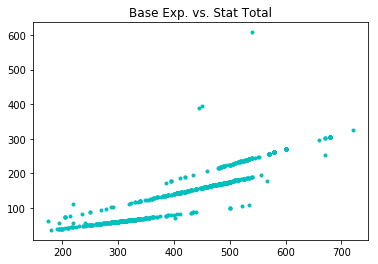

In [12]:
x = pokedex['total']
y = pokedex['base_experience']
plt.plot(x,y,'c.')
plt.title('Base Exp. vs. Stat Total')
plt.show()

What we can see here are 3 distinct lines with a couple of outliers at the top.

If you're in a hurry to make your Pokemon stronger, these are the ones that you hope to find in the wild so you can grow a lot faster. They'll give more experience than any other Pokemon.

In [13]:
pokedex[pokedex['base_experience'] > 350]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total
112,113,chansey,113,11,346,395,164,1,250,5,5,35,105,50,450
241,242,blissey,242,15,468,608,165,1,255,10,10,75,135,55,540
530,531,audino,531,11,310,390,622,1,103,60,86,60,86,50,445


By plotting the lines manually to try our best to get a good linear regression, we can try to figure out the similarities that the Pokemon on each line would have.

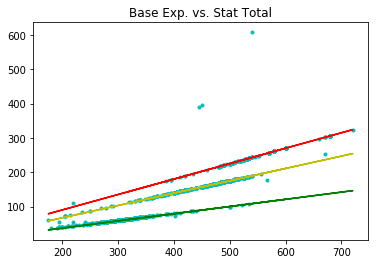

In [14]:
x = pokedex['total']
y = pokedex['base_experience']

# Best-fit lines
bf_y_low = 0.21*x-5
bf_y_mid = 0.36*x-5
bf_y_hgh = 0.45*x

plt.plot(x,y,'c.')
plt.plot(x,bf_y_low,'g')
plt.plot(x,bf_y_mid,'y')
plt.plot(x,bf_y_hgh,'r')
plt.title('Base Exp. vs. Stat Total')
plt.show()

We may or may not get every Pokemon in one go, so a threshold value will be put in place so we can try to get as many Pokemon as possible without having to obtain duplicates.

In [15]:
THRESH = 12

In [16]:
# Getting information on the low line
low = pokedex[(bf_y_low - 5 <= y + THRESH) & (bf_y_low - 5 >= y - THRESH)]
low

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total
0,1,bulbasaur,1,7,69,64,1,1,45,49,49,65,65,45,318
3,4,charmander,4,6,85,62,5,1,39,52,43,60,50,65,309
6,7,squirtle,7,5,90,63,10,1,44,48,65,50,64,43,314
9,10,caterpie,10,3,29,39,14,1,45,30,35,20,20,45,195
12,13,weedle,13,3,32,39,17,1,40,35,30,20,20,50,195
15,16,pidgey,16,3,18,50,21,1,40,45,40,35,35,56,251
18,19,rattata,19,3,35,51,25,1,30,56,35,25,35,72,253
20,21,spearow,21,3,20,52,30,1,40,60,30,31,31,70,262
22,23,ekans,23,20,69,58,32,1,35,60,44,40,54,55,288
26,27,sandshrew,27,6,120,60,45,1,50,75,85,20,30,40,300


It seems that most of the Pokemon that fell within that area are the first in their respective evolution line (e.g. Pidgey).

In [17]:
# Getting information on the middle line
mid = pokedex[(bf_y_mid <= y + THRESH) & (bf_y_mid >= y - THRESH)]
mid

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total
1,2,ivysaur,2,10,130,142,2,1,60,62,63,80,80,60,405
4,5,charmeleon,5,11,190,142,6,1,58,64,58,80,65,80,405
7,8,wartortle,8,10,225,142,11,1,59,63,80,65,80,58,405
10,11,metapod,11,7,99,72,15,1,50,20,55,25,25,30,205
13,14,kakuna,14,6,100,72,18,1,45,25,50,25,25,35,205
16,17,pidgeotto,17,11,300,122,22,1,63,60,55,50,50,71,349
19,20,raticate,20,7,185,145,27,1,55,81,60,50,70,97,413
21,22,fearow,22,12,380,155,31,1,65,90,65,61,61,100,442
23,24,arbok,24,35,650,157,33,1,60,95,69,65,79,80,448
24,25,pikachu,25,4,60,112,35,1,35,55,40,50,50,90,320


The middle line hits mostly Pokemon that have had one previous evolution (e.g. Pikachu and Arcanine), alongside many Pokemon that do not have a evolution line (e.g. Kangaskhan).

In [18]:
# Getting information on the high line
hgh = pokedex[(bf_y_hgh - 5 <= y + THRESH) & (bf_y_hgh - 5 >= y - THRESH)]
hgh

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total
2,3,venusaur,3,20,1000,236,3,1,80,82,83,100,100,80,525
5,6,charizard,6,17,905,240,7,1,78,84,78,109,85,100,534
8,9,blastoise,9,16,855,239,12,1,79,83,100,85,105,78,530
11,12,butterfree,12,11,320,178,16,1,60,45,50,90,80,70,395
14,15,beedrill,15,10,295,178,19,1,65,90,40,45,80,75,395
17,18,pidgeot,18,15,395,216,23,1,83,80,75,70,70,101,479
25,26,raichu,26,8,300,218,43,1,60,90,55,90,80,110,485
30,31,nidoqueen,31,13,600,227,51,1,90,92,87,75,85,76,505
33,34,nidoking,34,14,620,227,54,1,81,102,77,85,75,85,505
35,36,clefable,36,13,400,217,57,1,95,70,73,95,90,60,483


Most of the Pokemon that are within the high threshold consist of Pokemon that have had two previous evolutions (e.g. Typhlosion) and all of the legendary/mythical Pokemon (e.g. Dialga).

In [19]:
low['identifier'].nunique() + mid['identifier'].nunique() + hgh['identifier'].nunique()

799

I've hit most of the Pokemon. Only 8 are left out, 3 of which are the obvious outliers.

Let's check to see if there are any duplicates (Pokemon found in two or more of the data frames).

In [20]:
duplicates = pd.concat([low, mid, hgh], axis=0)

In [21]:
duplicates['is_dup'] = duplicates.duplicated()

In [22]:
duplicates[duplicates['is_dup']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,is_dup


By setting `THRESH = 12` it is the best I can go without adding any duplicates. Having to set `THRESH = 13`, Wishiwashi appears in both the medium and high lists. Increasing the number s.t. `THRESH = 16`, the weak stage one bug evolutions (Metapod, Kakuna, Silcoon, Cascoon, Spewpa) appear in both the medium and high lists.

If you want to see the Pokemon's evolution lines, click [here](https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_evolution_family).

## 3. Comparing by average

### 3.1 Comparison as a whole

I want to see how many Pokemon have each of their stats above average when compared to every Pokemon.

In [23]:
# Creating the average list

avg_list = [0]*6
for i in range(0,6):
    avg_list[i] = pokedex[b[i]].mean()
total_avg = np.sum(pokedex['total'])/len(pokedex['total'])
print(avg_list)
print(total_avg)

[68.748451053283773, 76.086741016109045, 71.726146220570016, 69.486988847583646, 70.01363073110285, 65.830235439900861]
421.892193309


The output of the list is the average of every Pokemon's HP, Attack, Defense, Sp. Attack, Sp. Defense, and Speed, respectively. I am going to go through each Pokemon and see how many of them have stats above average. I have created a function called `get_num_aa` (**get** the **num**ber of stats **a**bove **a**verage) to do that.

In [24]:
def get_num_aa(df, ls, al):
    '''
    Get the number of stats that are above average when compared to the other Pokemon.
    
    Parameters
    ----------
    df : the dataframe to compare
    ls : list of stats (average)
    al : the average list
    
    Returns
    -------
    Number of stats that are above average when compared to the other Pokemon.
    '''
    count = 0
    for i in range(0,6):
        if df[ls[i]] > al[i]:
            count += 1
    return count

In [25]:
pokedex['num_aa'] = pokedex.apply(lambda x : get_num_aa(x, b, avg_list), axis=1)

I had an error where they recommended me to use some `.loc()` function but what I didn't know is I could create a copy of the `pokedex` DataFrame I created up top by using `.copy()`.

In [26]:
pokedex

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa
0,1,bulbasaur,1,7,69,64,1,1,45,49,49,65,65,45,318,0
1,2,ivysaur,2,10,130,142,2,1,60,62,63,80,80,60,405,2
2,3,venusaur,3,20,1000,236,3,1,80,82,83,100,100,80,525,6
3,4,charmander,4,6,85,62,5,1,39,52,43,60,50,65,309,0
4,5,charmeleon,5,11,190,142,6,1,58,64,58,80,65,80,405,2
5,6,charizard,6,17,905,240,7,1,78,84,78,109,85,100,534,6
6,7,squirtle,7,5,90,63,10,1,44,48,65,50,64,43,314,0
7,8,wartortle,8,10,225,142,11,1,59,63,80,65,80,58,405,2
8,9,blastoise,9,16,855,239,12,1,79,83,100,85,105,78,530,6
9,10,caterpie,10,3,29,39,14,1,45,30,35,20,20,45,195,0


It works! Let's find out which Pokemon have *ALL* stats above average.

In [27]:
great_poke = pokedex[pokedex['num_aa'] == 6]

In [28]:
great_poke['identifier'].unique()

array(['venusaur', 'charizard', 'blastoise', 'nidoqueen', 'nidoking',
       'golduck', 'arcanine', 'poliwrath', 'articuno', 'zapdos', 'moltres',
       'dragonite', 'mewtwo', 'mew', 'meganium', 'typhlosion',
       'feraligatr', 'crobat', 'kingdra', 'raikou', 'entei', 'lugia',
       'ho-oh', 'celebi', 'flygon', 'glalie', 'salamence', 'metagross',
       'latias', 'latios', 'kyogre', 'groudon', 'rayquaza', 'jirachi',
       'luxray', 'garchomp', 'mesprit', 'dialga', 'palkia', 'heatran',
       'regigigas', 'giratina-altered', 'phione', 'manaphy', 'darkrai',
       'shaymin-land', 'arceus', 'victini', 'seismitoad', 'leavanny',
       'vanilluxe', 'hydreigon', 'cobalion', 'terrakion', 'virizion',
       'reshiram', 'zekrom', 'landorus-incarnate', 'kyurem',
       'meloetta-aria', 'genesect', 'slurpuff', 'xerneas', 'yveltal',
       'zygarde', 'volcanion', 'decidueye', 'silvally', 'kommo-o',
       'tapu-koko', 'tapu-lele', 'tapu-bulu', 'solgaleo', 'lunala',
       'necrozma', 'marshadow

In [29]:
great_poke['identifier'].nunique()

77

Every couple of years, the people who help create the Pokemon games will release new Pokemon. It started with 151 in 1996, and now we have 807 distinct Pokemon. Every new batch of Pokemon is considered a "[generation](https://bulbapedia.bulbagarden.net/wiki/Generation)". In this case, the first 151 would be part of "Generation 1". There have been 7 generations within the past 20+ years.

Whenever you play a main series Pokemon game (excluding Pokemon Yellow), you are usually given a choice between 3 Pokemon to start out with (with grass, fire and water typings) called [starter Pokemon](https://bulbapedia.bulbagarden.net/wiki/Starter_Pok%C3%A9mon). It seems that the starter Pokemons from generations 1 and 2 appear in this list, but only *ONE* Pokemon from the remaining five generations appears in this list too (Decidueye). Have the starters (and possibly Pokemon in general) gotten less balanced over the years?

After checking which generation each Pokemon in the list came from, I came with these results:

Gen 1: 14 <br>
Gen 2: 10 <br>
Gen 3: 10 <br>
Gen 4: 13 <br>
Gen 5: 14 <br>
Gen 6: 5 <br>
Gen 7: 11 <br>

Most of the generations seem to have similar numbers (excluding generation 6).

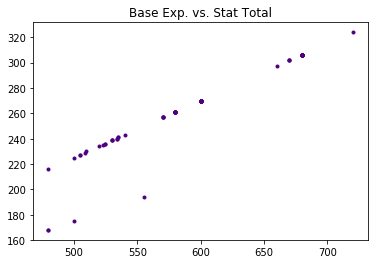

In [30]:
x = great_poke['total']
y = great_poke['base_experience']
plt.plot(x,y,c=(0.3,0,0.5),marker='.',linestyle='none')
plt.title('Base Exp. vs. Stat Total')
plt.show()

There are two noticable lines - one with multiple Pokemon (the high line from before) and one with a handful of Pokemon (the middle line from before).

In [31]:
great_poke[great_poke['base_experience'] < 200]['id'].nunique()

4

In [32]:
great_poke[great_poke['base_experience'] < 200]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa
54,55,golduck,55,17,766,175,85,1,80,82,78,95,80,85,500,6
58,59,arcanine,59,19,1550,194,89,1,90,110,80,100,80,95,555,6
361,362,glalie,362,15,2565,168,457,1,80,80,80,80,80,80,480,6
684,685,slurpuff,685,8,50,168,791,1,82,80,86,85,75,72,480,6


It looked like there should've been 3 points but knowing that Slurpuff and Glalie have identical points makes sense.

In [33]:
num_aa_0 = pokedex[pokedex['num_aa'] == 0]
num_aa_1 = pokedex[pokedex['num_aa'] == 1]
num_aa_2 = pokedex[pokedex['num_aa'] == 2]
num_aa_3 = pokedex[pokedex['num_aa'] == 3]
num_aa_4 = pokedex[pokedex['num_aa'] == 4]
num_aa_5 = pokedex[pokedex['num_aa'] == 5]

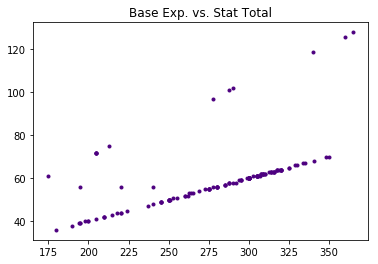

In [34]:
x = num_aa_0['total']
y = num_aa_0['base_experience']
plt.plot(x,y,c=(0.3,0,0.5),marker='.',linestyle='none')
plt.title('Base Exp. vs. Stat Total')
plt.show()

In [35]:
num_aa_0[num_aa_0['total'] > 350]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa
32,33,nidorino,33,9,195,128,53,1,61,72,57,55,55,65,365,0
326,327,spinda,327,11,50,126,415,1,60,60,60,60,60,60,360,0


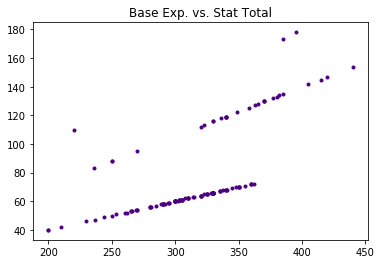

In [36]:
x = num_aa_1['total']
y = num_aa_1['base_experience']
plt.plot(x,y,c=(0.3,0,0.5),marker='.',linestyle='none')
plt.title('Base Exp. vs. Stat Total')
plt.show()

In [37]:
num_aa_1[num_aa_1['total'] > 400]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa
52,53,persian,53,10,320,154,82,1,65,70,60,65,65,115,440,1
201,202,wobbuffet,202,13,285,142,278,1,190,33,58,33,58,33,405,1
205,206,dunsparce,206,15,140,145,282,1,100,70,70,65,65,45,415,1
782,783,hakamo-o,783,12,470,147,929,1,55,75,90,65,70,65,420,1


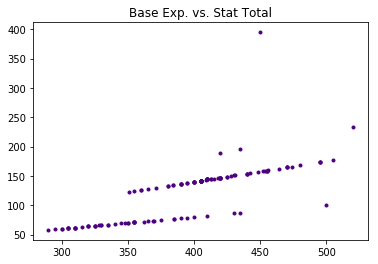

In [38]:
x = num_aa_2['total']
y = num_aa_2['base_experience']
plt.plot(x,y,c=(0.3,0,0.5),marker='.',linestyle='none')
plt.title('Base Exp. vs. Stat Total')
plt.show()

In [39]:
num_aa_2[num_aa_2['total'] > 475]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa
212,213,shuckle,213,6,205,177,288,1,20,10,230,10,230,5,505,2
408,409,rampardos,409,16,1025,173,514,1,97,165,60,65,50,58,495,2
410,411,bastiodon,411,13,1495,173,516,1,60,52,168,47,138,30,495,2
680,681,aegislash-shield,681,17,530,234,786,1,60,50,150,50,150,60,520,2
702,703,carbink,703,3,57,100,808,1,50,50,150,50,150,50,500,2
747,748,toxapex,748,7,145,173,874,1,50,63,152,53,142,35,495,2
757,758,salazzle,758,12,222,168,886,1,68,64,60,111,60,117,480,2


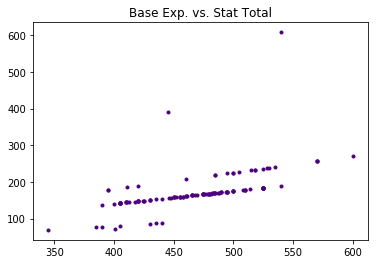

In [40]:
x = num_aa_3['total']
y = num_aa_3['base_experience']
plt.plot(x,y,c=(0.3,0,0.5),marker='.',linestyle='none')
plt.title('Base Exp. vs. Stat Total')
plt.show()

In [41]:
num_aa_3[num_aa_3['total'] > 550]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa
385,386,deoxys-normal,386,17,608,270,490,1,50,150,50,150,50,150,600,3
797,798,kartana,798,3,1,257,945,1,59,181,131,59,31,109,570,3
798,799,guzzlord,799,55,8880,257,946,1,223,101,53,97,53,43,570,3
804,805,stakataka,805,55,8200,257,956,1,61,131,211,53,101,13,570,3


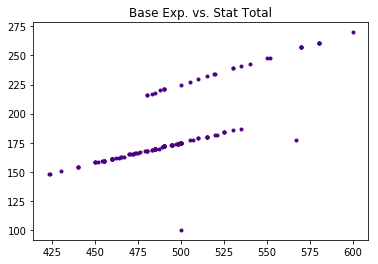

In [42]:
x = num_aa_4['total']
y = num_aa_4['base_experience']
plt.plot(x,y,c=(0.3,0,0.5),marker='.',linestyle='none')
plt.title('Base Exp. vs. Stat Total')
plt.show()

In [43]:
num_aa_4[num_aa_4['total'] > 550]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa
376,377,regirock,377,17,2300,261,476,1,80,100,200,50,100,50,580,4
377,378,regice,378,18,1750,261,477,1,80,50,100,100,200,50,580,4
378,379,registeel,379,19,2050,261,478,1,80,75,150,75,150,50,580,4
481,482,azelf,482,3,3,261,571,1,75,125,70,125,70,115,580,4
566,567,archeops,567,14,320,177,661,1,75,140,65,112,65,110,567,4
670,671,florges,671,11,100,248,775,1,78,65,68,112,154,75,552,4
718,719,diancie,719,7,88,270,833,1,50,100,150,100,150,50,600,4
792,793,nihilego,793,12,555,257,940,1,109,53,47,127,131,103,570,4
793,794,buzzwole,794,24,3336,257,941,1,107,139,139,53,53,79,570,4
794,795,pheromosa,795,18,250,257,942,1,71,137,37,137,37,151,570,4


Who's the outlier (stat total ~= 500, base exp ~= 100)???

In [44]:
num_aa_4[num_aa_4['base_experience'] < 125]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa
692,693,clawitzer,693,13,353,100,799,1,71,73,88,120,89,59,500,4


Interesting...

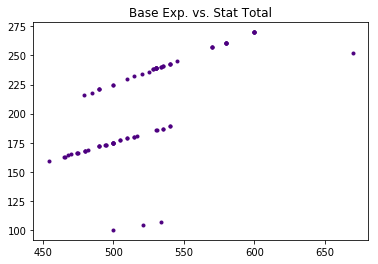

In [45]:
x = num_aa_5['total']
y = num_aa_5['base_experience']
plt.plot(x,y,c=(0.3,0,0.5),marker='.',linestyle='none')
plt.title('Base Exp. vs. Stat Total')
plt.show()

In [46]:
num_aa_5[num_aa_5['total'] > 550]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa
244,245,suicune,245,20,1870,261,317,1,100,75,115,90,115,85,580,5
247,248,tyranitar,248,20,2020,270,320,1,100,134,110,95,100,61,600,5
288,289,slaking,289,20,1305,252,368,1,150,160,100,95,65,100,670,5
479,480,uxie,480,3,3,261,569,1,75,75,130,75,130,95,580,5
487,488,cresselia,488,15,856,270,578,1,120,70,120,75,130,85,600,5
640,641,tornadus-incarnate,641,15,630,261,735,1,79,115,70,125,80,111,580,5
641,642,thundurus-incarnate,642,15,610,261,737,1,79,115,70,125,80,111,580,5
646,647,keldeo-ordinary,647,14,485,261,746,1,91,72,90,129,90,108,580,5
705,706,goodra,706,20,1505,270,811,1,90,100,70,110,150,80,600,5
719,720,hoopa,720,5,90,270,835,1,80,110,60,150,130,70,600,5


In [47]:
num_aa_5[num_aa_5['total'] < 460]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa
454,455,carnivine,455,14,270,159,557,1,74,100,72,90,72,46,454,5


Oh damn

In [48]:
num_aa_5[num_aa_5['base_experience'] < 125]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa
122,123,scyther,123,15,560,100,179,1,70,110,80,55,80,105,500,5
698,699,aurorus,699,27,2250,104,805,1,123,77,72,99,92,58,521,5
771,772,type-null,772,19,1205,107,901,1,95,95,95,95,95,59,534,5


How do the Pokemon stack up?

For those that would be found on the low line, they seem to be prevalent where `num_aa` is from 0 to 3, only a handful of them appear from 4 and 5, and are completely non existent in 6.

The middle line seems to be all over the place. Though not as frequent when `num_aa` is 0, many are at 1 and a lot more appear at 2 to 4. They slowly disappear at 5 and only four appear at 6.

The high line is entirely absent when `num_aa` equals 0, and almost blank at 1 and 2. Surprisingly enough, they aren't too much of a commodity from 3 to 6. It is duly noted that the number of Pokemon hit by the high line is 103 fewer than those hit by the low line.

### 3.2 Comparison by generation

Alongside comparing the Pokemon as a whole, how do they stack up within their own generation? Let's split them up into their respective introductions.

In [49]:
gen_1 = pokedex[pokedex['id'] <= 151].copy()
gen_2 = pokedex[(pokedex['id'] >= 152) & (pokedex['id'] <= 251)].copy()
gen_3 = pokedex[(pokedex['id'] >= 252) & (pokedex['id'] <= 386)].copy()
gen_4 = pokedex[(pokedex['id'] >= 387) & (pokedex['id'] <= 493)].copy()
gen_5 = pokedex[(pokedex['id'] >= 494) & (pokedex['id'] <= 649)].copy()
gen_6 = pokedex[(pokedex['id'] >= 650) & (pokedex['id'] <= 721)].copy()
gen_7 = pokedex[(pokedex['id'] >= 722)].copy()

Let's create a function called `get_avg` so we can calculate each of the individual stat averages in each generation.

In [50]:
def get_avg(df):
    '''
    Return the list of average stats of a data set.
    
    Parameters
    ----------
    df : data set
    
    Returns
    -------
    The list of average stats of a data set.
    '''
    avg_list = [0]*6
    for i in range(len(avg_list)):
        avg_list[i] = df[b[i]].mean()
    return avg_list

Let's see if this works...

In [51]:
get_avg(gen_1)

[64.211920529801318,
 72.913907284768214,
 68.225165562913901,
 67.139072847682115,
 66.086092715231786,
 69.066225165562912]

In [52]:
gen_1['num_aa_gen'] = gen_1.apply(lambda x : get_num_aa(x, b, get_avg(gen_1)), axis=1)

In [53]:
gen_1

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen
0,1,bulbasaur,1,7,69,64,1,1,45,49,49,65,65,45,318,0,0
1,2,ivysaur,2,10,130,142,2,1,60,62,63,80,80,60,405,2,2
2,3,venusaur,3,20,1000,236,3,1,80,82,83,100,100,80,525,6,6
3,4,charmander,4,6,85,62,5,1,39,52,43,60,50,65,309,0,0
4,5,charmeleon,5,11,190,142,6,1,58,64,58,80,65,80,405,2,2
5,6,charizard,6,17,905,240,7,1,78,84,78,109,85,100,534,6,6
6,7,squirtle,7,5,90,63,10,1,44,48,65,50,64,43,314,0,0
7,8,wartortle,8,10,225,142,11,1,59,63,80,65,80,58,405,2,2
8,9,blastoise,9,16,855,239,12,1,79,83,100,85,105,78,530,6,6
9,10,caterpie,10,3,29,39,14,1,45,30,35,20,20,45,195,0,0


Just by first glance Beedrill and Pidgeot are better while comparing only gen 1 Pokemon to every Pokemon. Let's apply this to the other generations and take notes.

In [54]:
gen_2['num_aa_gen'] = gen_2.apply(lambda x : get_num_aa(x, b, get_avg(gen_2)), axis=1)
gen_3['num_aa_gen'] = gen_3.apply(lambda x : get_num_aa(x, b, get_avg(gen_3)), axis=1)
gen_4['num_aa_gen'] = gen_4.apply(lambda x : get_num_aa(x, b, get_avg(gen_4)), axis=1)
gen_5['num_aa_gen'] = gen_5.apply(lambda x : get_num_aa(x, b, get_avg(gen_5)), axis=1)
gen_6['num_aa_gen'] = gen_6.apply(lambda x : get_num_aa(x, b, get_avg(gen_6)), axis=1)
gen_7['num_aa_gen'] = gen_7.apply(lambda x : get_num_aa(x, b, get_avg(gen_7)), axis=1)

gen_list = [gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7]

Let's see which Pokemon have above average stats in everything and compare by the each generation.

In [55]:
gen_1[gen_1['num_aa_gen'] == 6]['identifier'].unique()

array(['venusaur', 'charizard', 'blastoise', 'pidgeot', 'nidoqueen',
       'nidoking', 'ninetales', 'golduck', 'arcanine', 'poliwrath',
       'rapidash', 'articuno', 'zapdos', 'moltres', 'dragonite', 'mewtwo',
       'mew'], dtype=object)

In [56]:
gen_2[gen_2['num_aa_gen'] == 6]['identifier'].unique()

array(['meganium', 'typhlosion', 'feraligatr', 'crobat', 'politoed',
       'kingdra', 'raikou', 'entei', 'suicune', 'lugia', 'ho-oh', 'celebi'], dtype=object)

In [57]:
gen_3[gen_3['num_aa_gen'] == 6]['identifier'].unique()

array(['blaziken', 'flygon', 'glalie', 'walrein', 'salamence', 'metagross',
       'latias', 'latios', 'kyogre', 'groudon', 'rayquaza', 'jirachi'], dtype=object)

In [58]:
gen_4[gen_4['num_aa_gen'] == 6]['identifier'].unique()

array(['luxray', 'garchomp', 'mesprit', 'dialga', 'palkia', 'heatran',
       'regigigas', 'giratina-altered', 'manaphy', 'shaymin-land', 'arceus'], dtype=object)

In [59]:
gen_5[gen_5['num_aa_gen'] == 6]['identifier'].unique()

array(['victini', 'samurott', 'seismitoad', 'leavanny', 'vanilluxe',
       'hydreigon', 'cobalion', 'terrakion', 'virizion', 'reshiram',
       'zekrom', 'landorus-incarnate', 'kyurem', 'genesect'], dtype=object)

In [60]:
gen_6[gen_6['num_aa_gen'] == 6]['identifier'].unique()

array(['slurpuff', 'xerneas', 'yveltal', 'zygarde', 'volcanion'], dtype=object)

In [61]:
gen_7[gen_7['num_aa_gen'] == 6]['identifier'].unique()

array(['silvally', 'kommo-o', 'solgaleo', 'lunala', 'necrozma', 'marshadow'], dtype=object)

In [62]:
total_unique = 0

for i in range(len(gen_list)):
    total_unique += gen_list[i][gen_list[i]['num_aa_gen'] == 6]['identifier'].nunique()
    
print(total_unique)

77


Things that I noticed:
* Blaziken, the fire-type starter for generation 3, and Samurott, the water-type starter from generation 5, did *NOT* have above average stats in everything when compared to every Pokemon. Maybe the types of Pokemon that appear here are different?
* It is also noted that Decidueye, who had above average stats when compared to everything does *NOT* appear in generation 7. The list is much smaller.
* The number of Pokemon compared to everyone is equal to the number of Pokemon compared to in generations: 77.

Which Pokemon are worse in their own generation than compared to as a whole?

In [63]:
gen_1[gen_1['num_aa_gen'] < gen_1['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen
118,119,seaking,119,13,390,158,174,1,80,92,65,65,80,68,450,4,3


In [64]:
gen_2[gen_2['num_aa_gen'] < gen_2['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen
179,180,flaaffy,180,8,133,128,253,1,70,55,55,80,60,45,365,2,1
182,183,marill,183,4,85,88,257,1,70,20,50,20,50,40,250,1,0
184,185,sudowoodo,185,12,380,144,260,1,70,100,115,30,65,30,410,3,2
202,203,girafarig,203,15,415,159,279,1,70,80,65,90,65,85,455,4,3


In [65]:
gen_3[gen_3['num_aa_gen'] < gen_3['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen


In [66]:
gen_4[gen_4['num_aa_gen'] < gen_4['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen
390,391,monferno,391,9,220,142,498,1,64,78,52,78,52,81,405,3,2
391,392,infernape,392,12,550,240,499,1,76,104,71,104,71,108,534,5,4
413,414,mothim,414,9,233,148,521,1,70,94,50,94,50,66,424,4,2
415,416,vespiquen,416,12,385,166,523,1,70,80,102,80,102,40,474,5,3
420,421,cherrim,421,5,93,158,528,1,70,60,70,87,78,85,450,4,3
425,426,drifblim,426,12,150,174,532,1,150,80,44,90,54,80,498,4,3
431,432,purugly,432,10,438,158,537,1,71,82,64,64,59,112,452,3,2
434,435,skuntank,435,10,380,168,539,1,103,93,67,71,61,84,479,4,3
437,438,bonsly,438,5,150,58,259,1,50,80,95,10,45,10,290,2,1
438,439,mime-jr,439,6,130,62,177,1,20,25,45,70,90,60,310,2,1


In [67]:
gen_5[gen_5['num_aa_gen'] < gen_5['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen
506,507,herdier,507,9,147,130,598,1,65,80,65,35,65,60,370,1,0
508,509,purrloin,509,4,101,56,600,1,41,50,37,50,37,66,281,1,0
519,520,tranquill,520,6,150,125,611,1,62,77,62,50,42,65,358,1,0
524,525,boldore,525,9,1020,137,616,1,70,105,105,50,40,20,390,3,2
531,532,timburr,532,6,125,61,624,1,75,80,55,25,35,35,305,2,1
545,546,cottonee,546,3,6,56,638,1,40,27,60,37,50,66,280,1,0
548,549,lilligant,549,11,163,168,641,1,70,60,75,110,75,90,480,5,4
549,550,basculin-red-striped,550,10,180,161,642,1,70,92,65,80,55,98,460,4,3
553,554,darumaka,554,6,375,63,647,1,70,90,45,15,45,50,315,2,1
557,558,crustle,558,14,2000,170,652,1,70,105,125,65,75,45,485,4,3


In [68]:
gen_6[gen_6['num_aa_gen'] < gen_6['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen
654,655,delphox,655,15,390,240,756,1,75,69,72,114,100,104,534,5,4
657,658,greninja,658,15,400,239,759,1,72,95,67,103,71,122,530,5,4
667,668,pyroar,668,15,815,177,771,1,86,68,72,109,66,106,507,4,3
674,675,pangoro,675,21,1360,173,779,1,95,124,78,69,71,58,495,4,3
682,683,aromatisse,683,8,155,162,789,1,101,72,72,99,89,29,462,4,3
698,699,aurorus,699,27,2250,104,805,1,123,77,72,99,92,58,521,5,4
700,701,hawlucha,701,8,215,175,806,1,78,92,75,74,63,118,500,5,4


In [69]:
gen_7[gen_7['num_aa_gen'] < gen_7['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen
722,723,dartrix,723,7,160,147,839,1,78,75,75,70,70,52,420,3,1
723,724,decidueye,724,16,366,239,840,1,78,107,75,100,100,70,530,6,5
729,730,primarina,730,18,440,239,846,1,80,74,74,126,116,60,530,4,3
732,733,toucannon,733,11,260,218,849,1,80,120,75,75,75,60,485,5,2
736,737,charjabug,737,5,105,140,854,1,57,82,95,55,75,36,400,3,1
737,738,vikavolt,738,15,450,225,855,1,77,70,90,145,75,43,500,4,3
738,739,crabrawler,739,6,70,68,857,1,47,82,57,42,47,63,338,1,0
739,740,crabominable,740,17,1800,167,858,1,97,132,77,62,67,43,478,3,2
748,749,mudbray,749,10,1100,77,875,1,70,100,70,45,55,45,385,2,1
750,751,dewpider,751,3,40,54,877,1,38,40,52,40,72,27,269,1,0


In the first two generations, only **five** of Pokemon could say that they were better in their own generation. The data set for generation 3 was empty!

When it came for generations 4 through 7, the number of Pokemon that appeared was much larger.

Something that popped out straight away was Toucannon from generation 7: it has five stats above average compared to every Pokemon, but only **two** in its own generation, a difference of three! Some did have a difference of two, while most had a difference of one.

In [70]:
for i in range(len(gen_list)):
    print(gen_list[i]['identifier'][-gen_list[i]['num_aa_gen'] + gen_list[i]['num_aa'] == 3])

Series([], Name: identifier, dtype: object)
Series([], Name: identifier, dtype: object)
Series([], Name: identifier, dtype: object)
Series([], Name: identifier, dtype: object)
Series([], Name: identifier, dtype: object)
Series([], Name: identifier, dtype: object)
732    toucannon
Name: identifier, dtype: object


Now that we've checked which Pokemon fare better against others, which Pokemon are better in their own generation?

In [71]:
gen_1[gen_1['num_aa_gen'] > gen_1['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen
14,15,beedrill,15,10,295,178,19,1,65,90,40,45,80,75,395,3,4
17,18,pidgeot,18,15,395,216,23,1,83,80,75,70,70,101,479,5,6
19,20,raticate,20,7,185,145,27,1,55,81,60,50,70,97,413,2,3
21,22,fearow,22,12,380,155,31,1,65,90,65,61,61,100,442,2,3
23,24,arbok,24,35,650,157,33,1,60,95,69,65,79,80,448,3,4
26,27,sandshrew,27,6,120,60,45,1,50,75,85,20,30,40,300,1,2
37,38,ninetales,38,11,199,177,60,1,73,76,75,81,100,100,505,5,6
41,42,golbat,42,16,550,159,66,1,75,80,70,65,75,90,455,4,5
43,44,gloom,44,8,86,138,69,1,60,65,70,85,75,40,395,2,3
50,51,dugtrio,51,7,333,149,78,1,35,100,50,50,70,120,425,2,3


In [72]:
gen_2[gen_2['num_aa_gen'] > gen_2['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen
154,155,cyndaquil,155,5,79,62,231,1,39,52,43,60,50,65,309,0,1
161,162,furret,162,18,325,145,238,1,85,76,64,45,55,90,415,2,3
177,178,xatu,178,15,150,165,251,1,65,75,70,95,70,95,470,2,4
178,179,mareep,179,6,78,56,252,1,55,40,40,65,45,35,280,0,1
180,181,ampharos,181,14,615,230,254,1,90,75,85,115,90,55,510,4,5
185,186,politoed,186,11,339,225,93,1,90,75,75,90,100,70,500,5,6
188,189,jumpluff,189,8,30,207,263,1,75,55,70,55,95,110,460,3,4
189,190,aipom,190,8,115,72,264,1,55,70,55,40,55,85,360,1,2
191,192,sunflora,192,8,85,149,267,1,75,75,55,105,85,30,425,3,4
194,195,quagsire,195,14,750,151,271,1,95,85,85,65,65,35,430,3,4


In [73]:
gen_3[gen_3['num_aa_gen'] > gen_3['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen
256,257,blaziken,257,19,520,239,331,1,80,120,70,110,70,80,530,4,6
258,259,marshtomp,259,7,280,142,334,1,70,85,70,60,70,50,405,2,4
261,262,mightyena,262,10,370,147,338,1,70,90,70,60,60,70,420,3,4
266,267,beautifly,267,10,284,178,343,1,60,70,50,100,50,65,395,1,2
268,269,dustox,269,12,316,173,345,1,60,50,70,50,90,65,385,1,3
270,271,lombre,271,12,325,119,347,1,60,50,50,60,70,50,340,0,1
271,272,ludicolo,272,15,550,216,348,1,80,70,70,90,100,70,480,4,5
278,279,pelipper,279,12,280,154,355,1,60,50,100,95,70,65,440,2,4
281,282,gardevoir,282,16,484,233,358,1,68,65,65,125,115,80,518,3,4
282,283,surskit,283,5,17,54,362,1,40,30,32,50,52,65,269,0,1


In [74]:
gen_4[gen_4['num_aa_gen'] > gen_4['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen


In [75]:
gen_5[gen_5['num_aa_gen'] > gen_5['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen
502,503,samurott,503,15,946,238,594,1,95,100,85,108,70,70,528,5,6
504,505,watchog,505,11,270,147,596,1,60,85,69,60,69,77,420,2,3
544,545,scolipede,545,25,2005,218,637,1,60,100,89,55,69,112,485,3,4
552,553,krookodile,553,15,963,234,646,1,95,117,80,65,70,92,519,4,5
558,559,scraggy,559,6,118,70,653,1,50,75,70,35,70,48,348,0,1
585,586,sawsbuck,586,19,925,166,680,1,80,100,70,60,70,95,475,3,4
602,603,eelektrik,603,12,220,142,697,1,65,85,70,75,70,40,405,2,3
611,612,haxorus,612,18,1055,243,706,1,76,147,90,60,70,97,540,4,5
624,625,bisharp,625,16,700,172,719,1,65,125,100,60,70,70,490,3,4
633,634,zweilous,634,14,500,147,728,1,72,85,70,65,70,58,420,2,3


In [76]:
gen_6[gen_6['num_aa_gen'] > gen_6['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen
661,662,fletchinder,662,7,160,134,765,1,62,73,55,56,52,84,382,1,2
690,691,dragalge,691,18,815,173,797,1,65,75,90,97,123,44,494,3,4
692,693,clawitzer,693,13,353,100,799,1,71,73,88,120,89,59,500,4,5
704,705,sliggoo,705,8,175,158,810,1,68,75,53,83,113,60,452,2,3


In [77]:
gen_7[gen_7['num_aa_gen'] > gen_7['num_aa']]

,id,identifier,species_id,height,weight,base_experience,order,is_default,hp,atk,def,sat,sdf,spd,total,num_aa,num_aa_gen


It seems that there is some sort of inverse relationship going on here.

Generations 1 through 3 have many Pokemon that are better in their own generation. Unlike the above where not that many appeared when compared to other generations.

Generation 5 has an average sized list, nothing too large like the first three. Something I noticed is that the Special Defense stat is either 69 or 70 for each of the Pokemon.

Generation 6 has only four Pokemon. Also like generation 5, they have similar numbers in a stat. This time it's 73 or 75 in Attack.

Generations 4 and 7 are completely empty. It seems that the playing field is leveled off for these guys. Maybe they're the strongest stats wise? Let's check the average sums for each of the generations.

In [78]:
for i in range(len(gen_list)):
    print("Gen",i+1,"avg:",sum(get_avg(gen_list[i])))

Gen 1 avg: 407.642384106
Gen 2 avg: 407.18
Gen 3 avg: 403.725925926
Gen 4 avg: 445.757009346
Gen 5 avg: 425.756410256
Gen 6 avg: 429.583333333
Gen 7 avg: 449.395348837


Well it seems that generations 4 and 7 have the highest average stats, just like I hypothesized.

Like last time, let's see if there are any Toucannon-like cases (difference of three).

In [79]:
for i in range(len(gen_list)):
    print(gen_list[i]['identifier'][gen_list[i]['num_aa_gen'] - gen_list[i]['num_aa'] == 3])

Series([], Name: identifier, dtype: object)
205    dunsparce
Name: identifier, dtype: object
Series([], Name: identifier, dtype: object)
Series([], Name: identifier, dtype: object)
Series([], Name: identifier, dtype: object)
Series([], Name: identifier, dtype: object)
Series([], Name: identifier, dtype: object)


Dunsparce...interesting.

Let's try to plot each of the average stats in each generation, and compare them.

In [80]:
avg_stats_df = pd.DataFrame(np.array(get_avg(gen_1)).reshape(1,6),["gen_1"])

for i in range(1,len(gen_list)):
    avg_stats_df = pd.concat([avg_stats_df, pd.DataFrame(np.array(get_avg(gen_list[i])).reshape(1,6),
                                                         ["gen_"+ str(i+1)])], axis=0)

for i in range(0,len(b)):
    avg_stats_df.rename(columns={i: b[i]}, inplace=True)

avg_stats_df = avg_stats_df.reset_index()
avg_stats_df.rename(columns={'index': 'generation'}, inplace=True)
avg_stats_df

,generation,hp,atk,def,sat,sdf,spd
0,gen_1,64.211921,72.913907,68.225166,67.139073,66.086093,69.066225
1,gen_2,70.980000,68.260000,69.690000,64.500000,72.340000,61.410000
2,gen_3,65.666667,73.111111,69.007407,67.859259,66.466667,61.614815
3,gen_4,73.102804,80.214953,75.205607,73.280374,74.476636,69.476636
4,gen_5,70.314103,81.032051,71.237179,69.243590,67.333333,66.596154
5,gen_6,68.916667,72.500000,75.222222,72.541667,74.722222,65.680556
6,gen_7,70.558140,84.325581,78.139535,75.127907,75.139535,66.104651


Let's plot each of the stats and compare. We'll plot them so the smallest values will be on the left side.

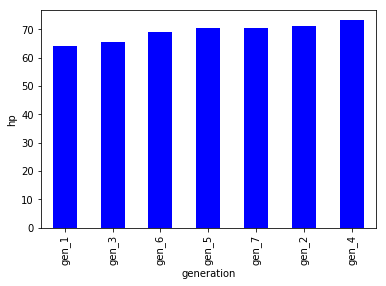

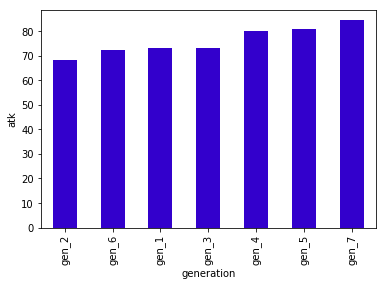

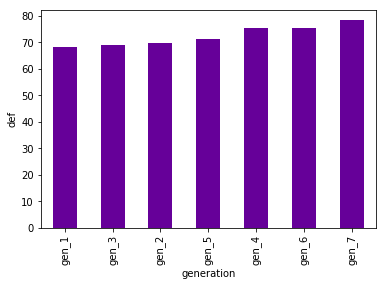

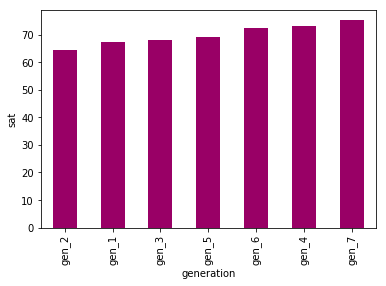

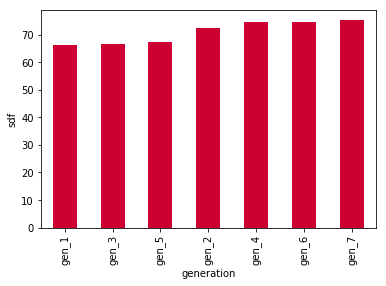

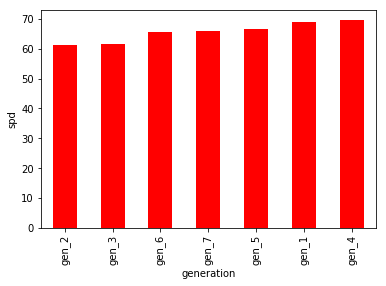

In [81]:
for i in range(len(b)):
    avg_stats_df.groupby('generation').sum()[b[i]].sort_values().plot(kind='bar',color=(i/5,0,(5-i)/5))
    plt.ylabel(b[i])
    plt.show()

Things to notice:
* Generation 4 has some of the highest average stats in each category. Its lowest stats are only third best.
* Even though generation 7 only lacks in speed (4th compared to other generations), it has the highest average stat in 4 different categories.
* Generation 3 has all of their stats 4th or below, but never last. The lowest stats are either from generation 1 (HP, Defense, Sp. Defense) or generation 2 (Attack, Sp. Attack, Speed).
    * Generations 1 and 2 have a stat in 2nd: HP and Speed, respectively.

## 4. Extra stuff

I created a function to determine which stats are above average for a Pokemon.

In [82]:
def get_is_aa(df, ls, al):
    '''
    Get which of that stats are above average when compared to the other Pokemon.
    
    Parameters
    ----------
    df : the dataframe to compare
    ls : list of stats (average)
    al : the average list
    
    Returns
    -------
    Number of stats that are above average when compared to the other Pokemon.
    You can check if the stat is above average if that spot in the list is 1,
    otherwise it will be 0.
    '''
    poke_avg = get_avg(df)
    list_aa = [0]*6
    for i in range(0,6):
        if poke_avg[i] > al[i]:
            list_aa[i] = 1
    return list_aa

Let's test it out on a couple:

In [83]:
pidgeot = gen_1[gen_1['identifier'] == 'pidgeot'].copy()
probopass = gen_4[gen_4['identifier'] == 'probopass'].copy()

In [84]:
print("Pidgeot in gen 1:",get_is_aa(pidgeot, b, get_avg(gen_1)))
print("Pidgeot in all:",get_is_aa(pidgeot, b, get_avg(pokedex)))

print("Probopass in gen 4:",get_is_aa(probopass, b, get_avg(gen_4)))
print("Probopass in all:",get_is_aa(probopass, b, get_avg(pokedex)))

Pidgeot in gen 1: [1, 1, 1, 1, 1, 1]
Pidgeot in all: [1, 1, 1, 1, 0, 1]
Probopass in gen 4: [0, 0, 1, 1, 1, 0]
Probopass in all: [0, 0, 1, 1, 1, 0]


In [85]:
get_avg(pokedex)

[68.748451053283773,
 76.086741016109045,
 71.726146220570016,
 69.486988847583646,
 70.01363073110285,
 65.830235439900861]

In [86]:
get_avg(pidgeot)

[83.0, 80.0, 75.0, 70.0, 70.0, 101.0]

I wasn't aware Pidgeot was *really* close to having 6 stats above average. Pidgeot is in my top 10 list of favourite Pokemon, so seeing this hurts me a little.

Anyways that's all I have. Thanks for reading!